# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

In [10]:
# 1. Inspeksi profile data
print(F"Shape dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")


Shape dataset: (48842, 15)
Jumlah baris: 48842
Jumlah kolom: 15


In [11]:
# 2. Missing values tiap kolom
missing_values = df.isnull().sum()
print("Missing values per kolom:")
print(missing_values)

Missing values per kolom:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [16]:
#  Menampilkan kolom dengan missing values
missing_columns = missing_values[missing_values > 0]
print("Jadi kolom dengan missing values adalah:")
if len(missing_columns) > 0:
    for col, count in missing_columns.items():
        percentage = (count / len(df)) * 100
        print(f"{col}: {count}")
else:
    print("Tidak ada kolom dengan missing values.")

print(f"\nTotal kolom dengan missing values: {missing_values.sum()}")

Jadi kolom dengan missing values adalah:
workclass: 963
occupation: 966
native-country: 274

Total kolom dengan missing values: 2203


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

In [18]:
# 1. Proses data imputation
# Mengidentifikasi kolom yang memiliki nilai kosong
missing_values_cols = df.columns[df.isnull().any()].tolist()

# Imputasi dengan modus 
for col in missing_values_cols:
    # Hitung modus
    mode_value = df[col].mode()[0]
    # Mengisi missing_values dengan modus
    df[col].fillna(mode_value, inplace=True)
    print(f"Nilai yang hilang pada kolom '{col}' diisi dengan modus: {mode_value}")

print("\n" + "=" * 50 + "\n")

Nilai yang hilang pada kolom 'workclass' diisi dengan modus: Private
Nilai yang hilang pada kolom 'occupation' diisi dengan modus: Prof-specialty
Nilai yang hilang pada kolom 'native-country' diisi dengan modus: United-States




C:\Users\natha\AppData\Local\Temp\ipykernel_17956\3870422591.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [19]:
# Mengecek kembali apakah masih ada missing values
remaining_missing = df.isnull().sum()
print(remaining_missing)

if remaining_missing.sum() == 0:
    print("Semua nilai yang hilang telah diisi.")
else: 
    print("Masih ada nilai yang hilang pada beberapa kolom.")

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
Semua nilai yang hilang telah diisi.


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

In [20]:
# Identifikasi kolom kualitatif
categorical_cols = df.select_dtypes(include=['object']).columns

print("cek nilai unik:")
for col in categorical_cols:
    print(f"Kolom '{col}': {df[col].unique()}")
print("\n" + "=" * 50 + "\n")

cek nilai unik:
Kolom 'workclass': ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Kolom 'education': ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Kolom 'marital-status': ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Kolom 'occupation': ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Kolom 'relationship': ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
Kolom 'race': ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Kolom 'sex': ['Male' 'Female']
Kolom 'native-country': ['United-States' 'Cu

In [21]:
# Ganti nilai tidak sesuai dengan 'other'
column_with_question_mark = ['workclass', 'occupation', 'native-country']
for col in column_with_question_mark:
    df[col].replace('?', 'Others', inplace=True)
    print(f"Nilai '?' pada kolom '{col}' telah diganti dengan 'Others'")

print("\n" + "=" * 50 + "\n")

Nilai '?' pada kolom 'workclass' telah diganti dengan 'Others'
Nilai '?' pada kolom 'occupation' telah diganti dengan 'Others'
Nilai '?' pada kolom 'native-country' telah diganti dengan 'Others'




In [22]:
# Menyesuaikan duplikasi karena kesalahan penulisan
print("Menyesuaikan duplikasi karena kesalahan penulisan pada kolom 'income' ")
print(f"Nilai unique sebelum diperbaiki: {df['income'].unique()}")

# Menghapus titik di akhir string pada kolom 'income' 
df['income'] = df['income'].str.replace('.', '', regex=False)
print(f"Nilai unique setelah diperbaiki: {df['income'].unique()}")

print("\n" + "=" * 50 + "\n")

Menyesuaikan duplikasi karena kesalahan penulisan pada kolom 'income' 
Nilai unique sebelum diperbaiki: ['<=50K' '>50K' '<=50K.' '>50K.']
Nilai unique setelah diperbaiki: ['<=50K' '>50K']




In [23]:
# Verifikasi hasil
print("Nilai unique setelah permbersihan: ")
for col in categorical_cols:
    print(f"Kolom '{col}': {df[col].unique()}")

Nilai unique setelah permbersihan: 
Kolom 'workclass': ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc' 'Without-pay' 'Never-worked']
Kolom 'education': ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Kolom 'marital-status': ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Kolom 'occupation': ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Kolom 'relationship': ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
Kolom 'race': ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Kolom 'sex': ['Male' 'Female']
Kolom 'native-

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

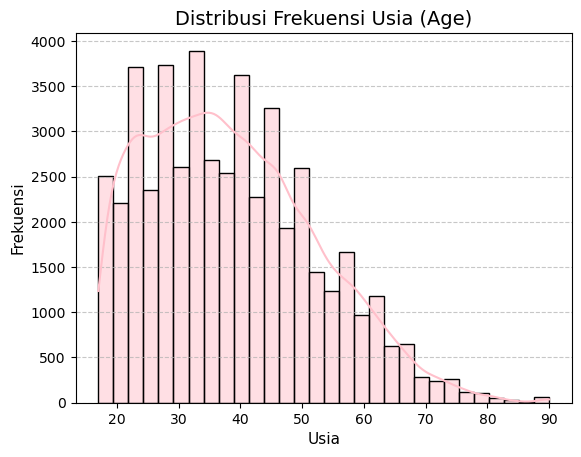

In [24]:
# Jawab 1.1 - Histrogram
plt.Figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True, color='pink')
plt.title('Distribusi Frekuensi Usia (Age)', fontsize=14)
plt.xlabel('Usia', fontsize=11)
plt.ylabel('Frekuensi', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_17956\4266673033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education', data=df, order=df['education'].value_counts().index, palette='viridis')


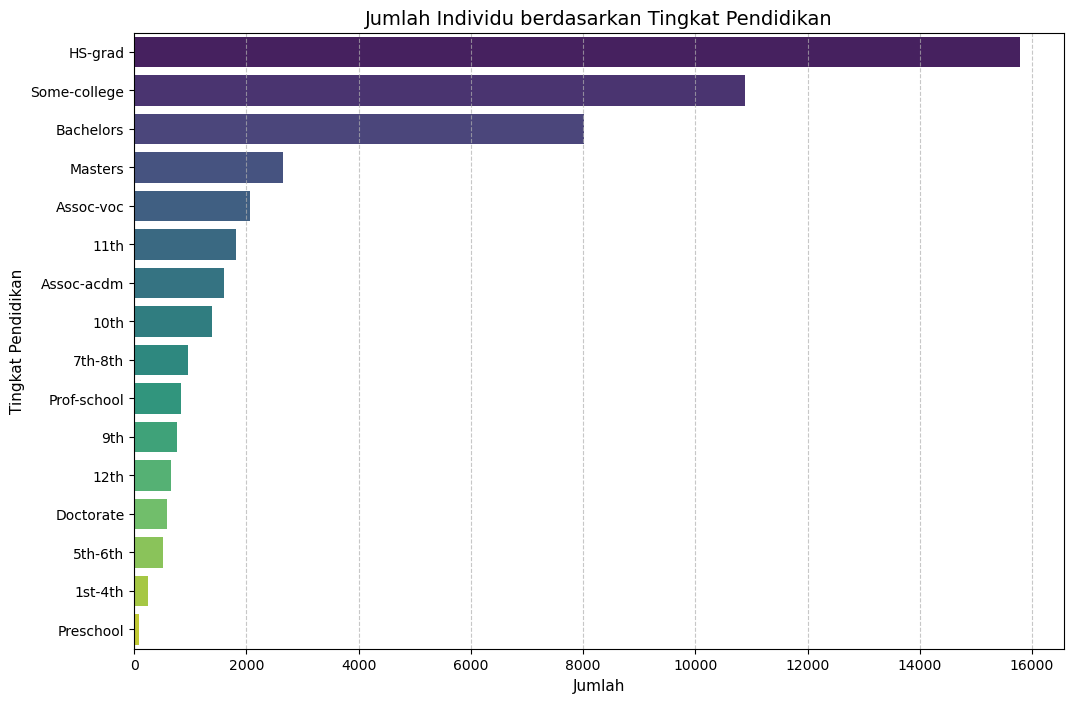

In [26]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(12, 8))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index, palette='viridis')
plt.title('Jumlah Individu berdasarkan Tingkat Pendidikan', fontsize=14)
plt.xlabel('Jumlah', fontsize=11)
plt.ylabel('Tingkat Pendidikan', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_17956\4149075288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=df, palette='coolwarm')


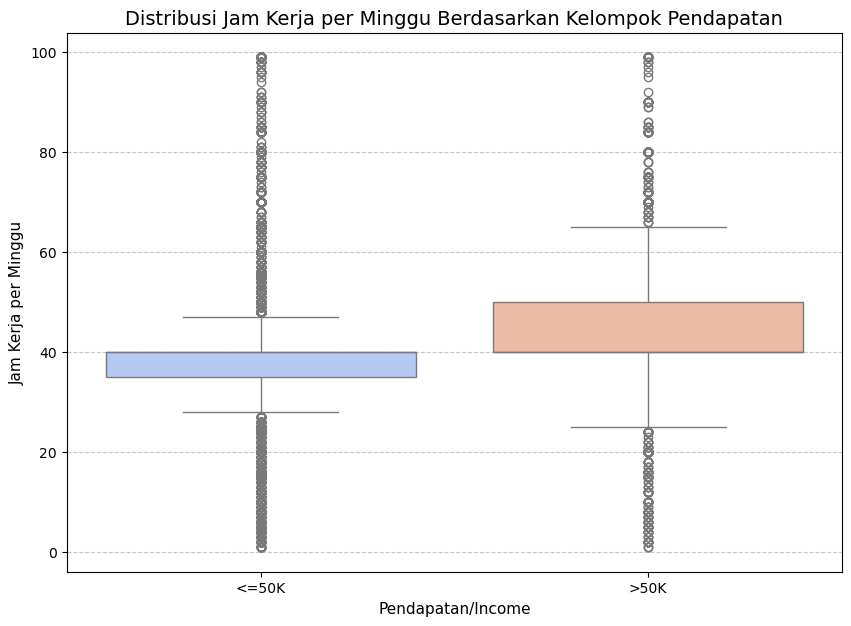

In [27]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(x='income', y='hours-per-week', data=df, palette='coolwarm')
plt.title('Distribusi Jam Kerja per Minggu Berdasarkan Kelompok Pendapatan', fontsize=14)
plt.xlabel('Pendapatan/Income', fontsize=11)
plt.ylabel('Jam Kerja per Minggu', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

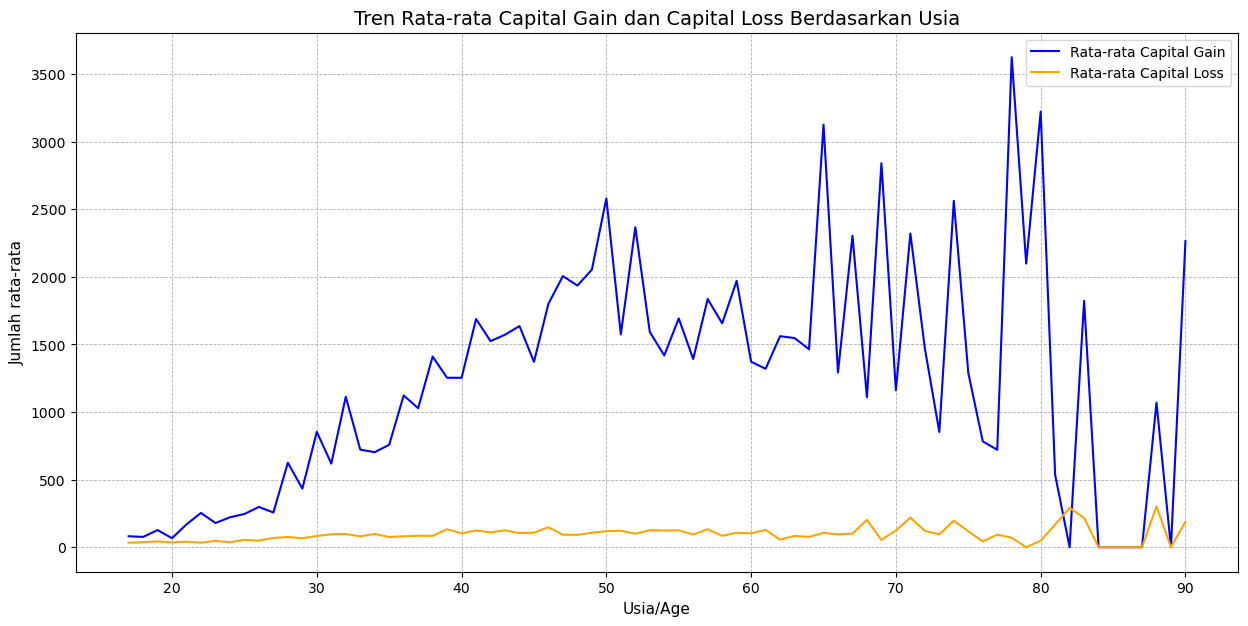

In [28]:
# Jawab 1.4 - Lineplot
age_analysis = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(15, 7))

# Plot untuk capital-gain dan capital-loss
sns.lineplot(x='age', y='capital-gain', data=age_analysis, label='Rata-rata Capital Gain', color='Blue')
sns.lineplot(x='age', y='capital-loss', data=age_analysis, label='Rata-rata Capital Loss', color='Orange')

plt.title('Tren Rata-rata Capital Gain dan Capital Loss Berdasarkan Usia', fontsize=14)
plt.xlabel('Usia/Age', fontsize=11)
plt.ylabel('Jumlah rata-rata', fontsize=11)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.6)
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
1. Berdasarkan histogram histogram, distribusi data 'age' condong ke kanan yang artinya, sebagian besar individu dalam dataset ini pada rentang usia muda hingga paruh baya (sekitar 20-45 tahun).
Frekuensi individu menurun secara bertahap seiring dengan bertambahnya usia, dengan jumlah yang jauh lebih sedikit pada kelompok usia tua.

2. Jika terdapat data yang hilang, strategi imptasi yang paling tepat adalah menggunakan median atau rata-rata karena distribusi data 'age' tidak simetris, median menjadi ukuran pusat yang lebih baik daripada rata-rata

'''

'\n  Bisa dengan multiple comment\n  seperti ini\n'

In [31]:
# 3 Hitung Outlier
for income_category in df['income'].unique():
    subset = df[df['income']== income_category]

    # Hitung Q1, Q3, dan IQR
    Q1 = subset['hours-per-week'].quantile(0.25)
    Q3 = subset['hours-per-week'].quantile(0.75)
    IQR = Q3-Q1

    # Hitung Batas atas dan bawah
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Jumlah Outlier
    outliers = subset[(subset['hours-per-week'] < batas_bawah) | (subset['hours-per-week'] > batas_atas)]
    num_outliers = len(outliers)

    print(f"Kategori income: {income_category}:")
    print(f" - Batas Bawah: {batas_bawah}")
    print(f" - Batas Atas: {batas_atas}")
    print(f" - Jumlah Outlier: {num_outliers}")
    print("-" * 20)

print("\nAnalisis Jumlah Outlier:")
print("Berdasarkan perhitungan di atas, kategori income '<=50K' memiliki jumlah outlier yang jauh lebih banyak dibandingkan kategori '>50K'.")
print("Ini menunjukkan bahwa pada kelompok berpenghasilan lebih rendah, variasi jam kerja per minggu (baik sangat sedikit maupun sangat banyak) lebih ekstrem.")

Kategori income: <=50K:
 - Batas Bawah: 27.5
 - Batas Atas: 47.5
 - Jumlah Outlier: 11706
--------------------
Kategori income: >50K:
 - Batas Bawah: 25.0
 - Batas Atas: 65.0
 - Jumlah Outlier: 781
--------------------

Analisis Jumlah Outlier:
Berdasarkan perhitungan di atas, kategori income '<=50K' memiliki jumlah outlier yang jauh lebih banyak dibandingkan kategori '>50K'.
Ini menunjukkan bahwa pada kelompok berpenghasilan lebih rendah, variasi jam kerja per minggu (baik sangat sedikit maupun sangat banyak) lebih ekstrem.


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding col 'Sex'
df['sex'] = le.fit_transform(df['sex'])
print(f"Mapping untuk 'sex': {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Encoding col 'income'
df['income'] = le.fit_transform(df['income'])
print(f"Mapping untuk 'income': {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\n" + "=" * 50 + "\n")

print("Hasil setelah encoding (kolom 'sex' dan 'income'):")
print(df[['sex', 'income']].head())



Mapping untuk 'sex': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
Mapping untuk 'income': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}


Hasil setelah encoding (kolom 'sex' dan 'income'):
   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

Matriks korelasi:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


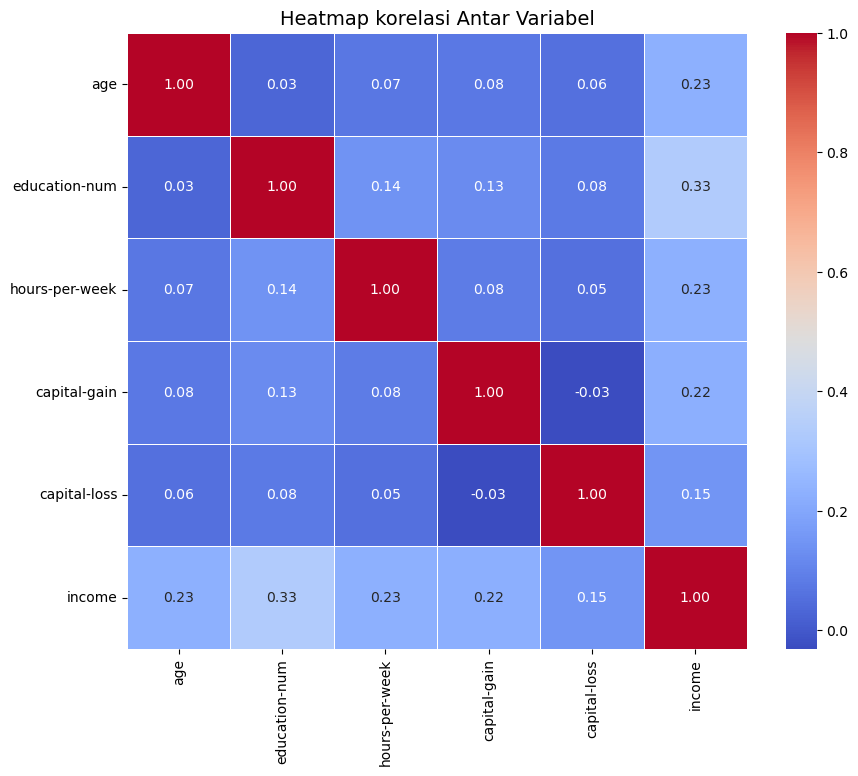

In [36]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
kolom_korelasi = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
subset_df = df[kolom_korelasi]

# Hitung matriks korelasi
matrix_korelasi = subset_df.corr()

print("Matriks korelasi:")
print(matrix_korelasi)

plt.figure(figsize=(10,8))
sns.heatmap(matrix_korelasi, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.6)
plt.title('Heatmap korelasi Antar Variabel', fontsize=14)
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini

'''
 terlihat jelas bahwa beberapa faktor memiliki hubungan positif yang signifikan
 dengan tingkat pendapatan (income). Tingkat pendidikan (education-num) menunjukkan
 korelasi positif terkuat, yang berarti semakin tinggi pendidikan seseorang,
 semakin besar kemungkinan pendapatannya di atas 50K.
 Selain itu, usia (age) dan jumlah jam kerja per minggu (hours-per-week) juga
 berkorelasi positif secara moderat, mengindikasikan bahwa pengalaman dan usaha
 lebih berkontribusi pada pendapatan yang lebih tinggi.
 Keuntungan modal (capital-gain) juga secara logis memiliki hubungan positif.
'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [41]:
!pip install -q tensorflow

In [42]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


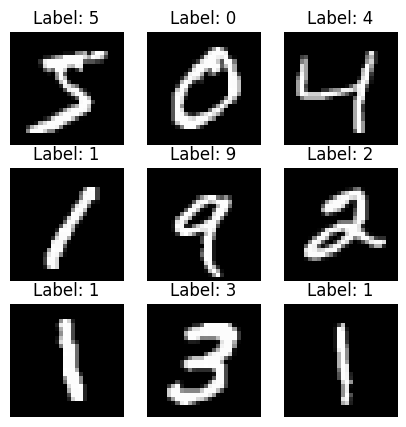

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Bentuk data asli: (10000, 28, 28)
Bentuk data setelah upsampling(32x32): (10000, 32, 32, 1)


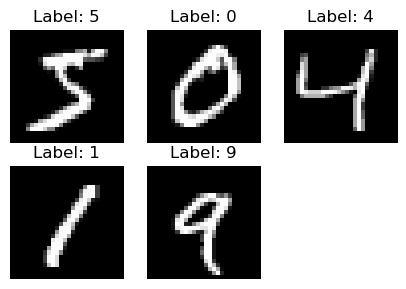

In [47]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
import tensorflow 
X_test_expanded = np.expand_dims(X_test, axis=-1)
X_test_upsampled = np.zeros((X_test.shape[0], 32, 32, 1))
X_test_upsampled = tensorflow.image.resize(X_test_expanded, [32, 32])
X_test_upsampled = X_test_upsampled.numpy()

print("Bentuk data asli:", X_test.shape)
print("Bentuk data setelah upsampling(32x32):", X_test_upsampled.shape)

# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Nilai piksel minimum setelah normalisasi: 0.0
Nilai piksel maksimum setelah normalisasi: 1.0


Contoh perbandingan nilai piksel untuk gambar pertama:
Nilai maks sebelum normalisasi: 254.0
Nilai maks setelah normalisasi: 0.9960784316062927

Visualisasi gambar pertama setelah normalisasi


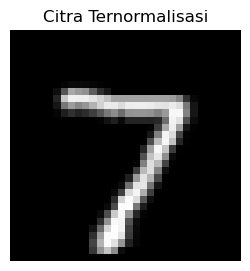

In [49]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
X_test_normalized = X_test_upsampled.astype('float32') / 255.0

min_val = np.min(X_test_normalized)
max_val = np.max(X_test_normalized)

print(f"Nilai piksel minimum setelah normalisasi: {min_val}")
print(f"Nilai piksel maksimum setelah normalisasi: {max_val}")


print("\n" + "="*50 + "\n")
print("Contoh perbandingan nilai piksel untuk gambar pertama:")
print(f"Nilai maks sebelum normalisasi: {np.max(X_test_upsampled[0])}")
print(f"Nilai maks setelah normalisasi: {np.max(X_test_normalized[0])}")

print("\nVisualisasi gambar pertama setelah normalisasi")
plt.figure(figsize=(3, 3))
plt.imshow(np.squeeze(X_test_normalized[0]), cmap='gray')
plt.title("Citra Ternormalisasi")
plt.axis('off')
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [50]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
num_images = X_test_normalized.shape[0]
X_test_flattened = X_test_normalized.reshape(num_images, -1)

# Verifikasi hasil
print(f"Shape data sebelum di-flatten: {X_test_normalized.shape}")
print(f"Shape data setelah di-flatten: {X_test_flattened.shape}")

print("\n" + "="*50 + "\n")

# Cek untuk memastikan bentuknya sudah benar
print("Verifikasi satu sampel:")
print(f"Shape dari gambar pertama setelah di-flatten: {X_test_flattened[0].shape}")
print(f"Jumlah elemen (piksel) dalam satu gambar: {X_test_flattened[0].size}")

if X_test_flattened.shape == (10000, 1024):
    print("\nProses flattening berhasil! Semua gambar telah diubah menjadi vektor 1D.")
else:
    print("\nTerjadi kesalahan. Periksa kembali shape data input.")

Shape data sebelum di-flatten: (10000, 32, 32, 1)
Shape data setelah di-flatten: (10000, 1024)


Verifikasi satu sampel:
Shape dari gambar pertama setelah di-flatten: (1024,)
Jumlah elemen (piksel) dalam satu gambar: 1024

Proses flattening berhasil! Semua gambar telah diubah menjadi vektor 1D.
